In [1]:
import numpy
from easy_utils.number_utils.number_utils import EasyFloat

from finance_utils.namedtuples import *
from finance_utils.uniontypes import *
from finance_utils.asset.spot.base import Spot,ServiceChargesSpot, SpotTradeBookUnit
# from finance_utils.asset.spot.strategy import SpotCostAveragingPlan
from finance_utils.strategy.dca import simple_dca, price_qualified_dca

from finance_utils.process.prices.gbm import RVDecoupledGBM, GBM, NormalDistribution
from finance_utils.trader.base import Trader, TradeBookUnit
from finance_utils.trader.utility import *

from data_utils.stochastic_utils.distributions.nonParametricDistribution import HistogramDist, KernelMixDist, SmoothHisDist
from data_utils.stochastic_utils.random_process.correlatedRandom import random_correlated_series
from easy_datetime.timestamp import TimeStamp
import tqdm

from matplotlib import pyplot

In [2]:
p=GBM("stock", 1, 0.03/264, 0.03, 264, TimeStamp.now().accurate_to("year"), "day", 1)
stock = ServiceChargesSpot("stock", 100, TradeDelta("day", 1))

In [3]:
# trigger_set = set(range(0,264,22))
trader = Trader("trader", 200 * 264, None)
ylist = []
for i,t,path in p.process_iter():
    # _,_ = simple_dca(p.s0, i, t, path, stock, trader, 10000, trigger_set)
    stock.purchased_to(trader, path.price, 200, t)
    ylist.append(trader.net_worth_rate(**path.dic))

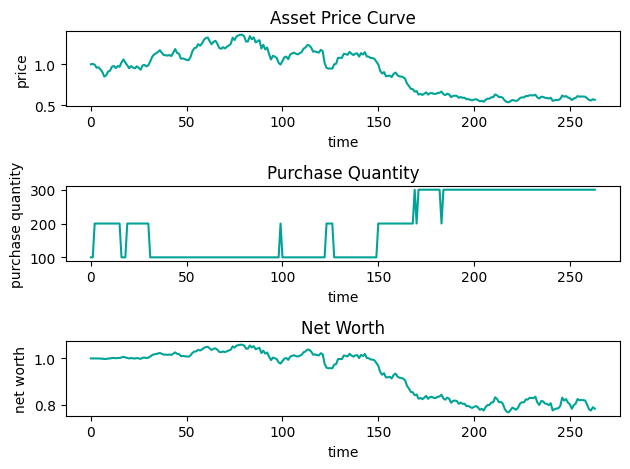

In [4]:
plist= []
slist = []
for b in trader.position[stock.name].book:
    b:SpotTradeBookUnit
    plist.append(b.price)
    slist.append(b.shares)
# numpy.column_stack((
#     numpy.array(plist),
#     numpy.array(slist)
# ))
pyplot.subplot(3,1,1)
pyplot.title("Asset Price Curve")
pyplot.plot(plist, color="#00a497")
pyplot.xlabel("time")
pyplot.ylabel("price")
pyplot.subplot(3,1,2)
pyplot.title("Purchase Quantity")
pyplot.plot(slist, color="#00a497")
pyplot.xlabel("time")
pyplot.ylabel("purchase quantity")
pyplot.subplot(3,1,3)
pyplot.plot(ylist, color="#00a497")
pyplot.title("Net Worth")
pyplot.xlabel("time")
pyplot.ylabel("net worth")
pyplot.tight_layout()
pyplot.show()

In [5]:
yl=[1.01529,1.01529,1.01529,1.01529,1.01529,1.01529,1.01529,1.01529,1.01529,1.01529,1.01529,1.01529,1.01529,1.01529,1.01529,1.01529,1.01529,1.01529,1.01529,1.01529,1.01529,1.01529,1.01529,1.01529,1.01529,1.01529,1.01529,1.01529,1.01529,1.01529,1.01529,1.01529,1.01529,1.05701,1.05701,1.09884,1.09884,1.14078,1.14078,1.14078,1.18281]
vl=EasyFloat.frange(0.01,0.05,0.001, True)

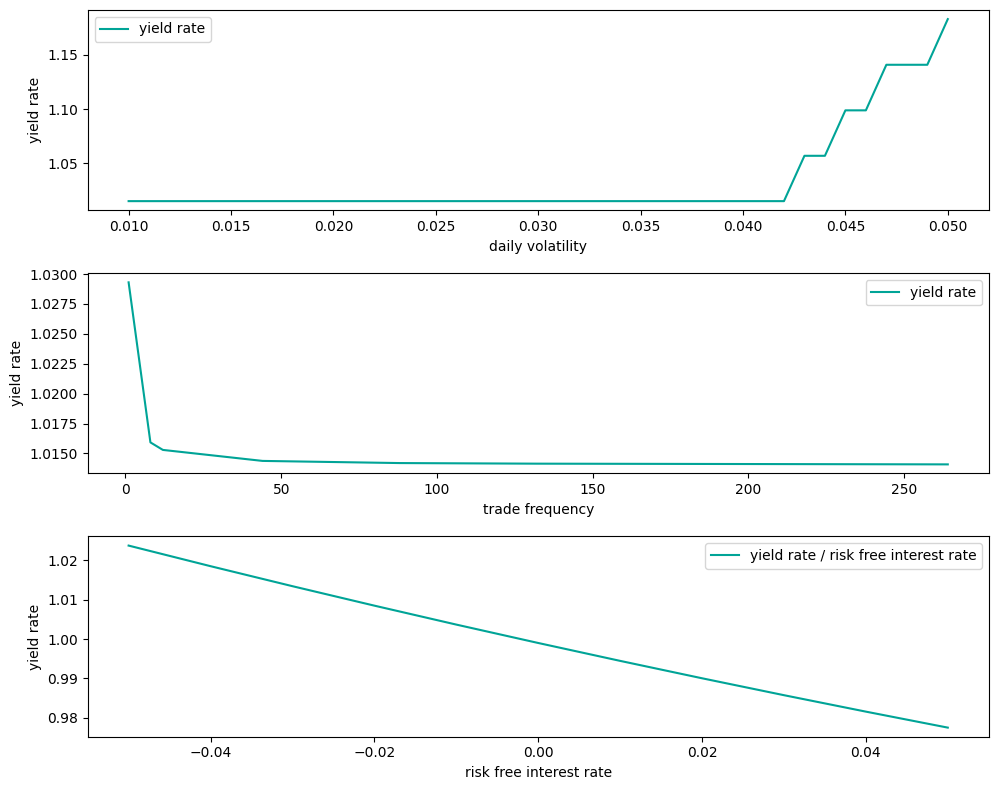

In [10]:
pyplot.figure(figsize=(10, 8))
# pyplot.suptitle("The relationship between yield and various financial factors")
# pyplot.title("The impact of volatility, trading frequency and risk-free interest rate on yield is shown respectively")

pyplot.subplot(3,1,1)
pyplot.plot(vl,yl, color="#00a497", label="yield rate")
pyplot.xlabel("daily volatility")
pyplot.ylabel("yield rate")
pyplot.legend()
pyplot.subplot(3,1,2)
pyplot.plot(dl,yl_d, color="#00a497", label="yield rate")
pyplot.xlabel("trade frequency")
pyplot.ylabel("yield rate")
pyplot.legend()

pyplot.subplot(3,1,3)
pyplot.plot(al,yl_a, color="#00a497", label="yield rate / risk free interest rate")
pyplot.xlabel("risk free interest rate")
pyplot.ylabel("yield rate")
pyplot.legend()

pyplot.tight_layout()
pyplot.show()

In [7]:
dl=[264/i for i in [1, 2, 3, 6, 22, 33, 264]]
yl_d = [1.01408, 1.01414, 1.01419, 1.01437, 1.01529, 1.01592, 1.02931]

In [8]:
dl

[264.0, 132.0, 88.0, 44.0, 12.0, 8.0, 1.0]

In [9]:
yl_a=[1.02378, 1.01854, 1.01345, 1.0085, 1.00368, 0.999, 0.994448, 0.990021, 0.985717, 0.981533, 0.977465]
al=EasyFloat.frange(-0.05,0.05,0.01, True)